<a href="https://colab.research.google.com/github/majorquev/DBDC_202103_Programacion_en_R_para_ciencia_de_datos/blob/main/Clases/Clase7/Clase7_1_Distribuciones_de_probabilidad_en_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 6: Distribuciones de probabilidad

**Autor:** Miguel Jorquera Viguera.<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Jorge Arévalo Labarca<br>
**E-mail ayudante:** jorge.arevalol@usach.cl

En R podemos obtener valores tanto de las funciones de densidad, distribución de probabilidad, cuantiles de una distribución o bien generar valores aleatorios de diversas distribuciones paramétricas.
Casi todas las distribuciones que se encuentran implementadas en la librería base de R se referencian de la misma manera.

* Funciones de densidad (PDFs) comienzan con la letra “d.”
* Funciones de distribución acumulada comienzan con la letra “p.”
* Funcioenes que retornan quantiles de una distribución comienzan con la letra “q.”
* Funciones que generan valores aleatorios comienzan con la letra“r.” 

Por defecto, en R contamos con una amplia variedad familias de distribuciones enre las que destacan las siguientes.



**Distribution**| **R name**| **additional arguments**
-----| -----| -----
beta |`beta` |shape1, shape2, ncp
binomial| `binom`| size, prob
Cauchy|`cauchy` |location, scale
chi-squared| `chisq`| df, ncp
exponential| `exp` |rate
F| `f` |df1, df2, ncp
gamma |`gamma` |shape, scale
geometric |`geom` |prob
hypergeometric| `hyper`| m, n, k
log-normal| `lnorm` |meanlog, sdlog
logistic |`logis` |location, scale
negative| `binomial`| nbinom size, prob
normal |`norm` |mean, sd
Poisson| `pois`| lambda
signed rank |`signrank`| n
Student’s t| `t`| df, ncp
uniform |`unif`| min, max
Weibull| `weibull`| shape, scale
Wilcoxon |`wilcox`|m, n




In [37]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# I) Distribución normal

## Función de densidad
$$f(x) = \frac{1}{\sqrt{2 π \sigma^2}} e^{-\frac{1}{2\sigma^2}(x - \mu)^2}$$

## En R...

* `dnorm(x, mean = 0, sd = 1, log = FALSE)`: Evalúa la función de densidad.
* `pnorm(q, mean = 0, sd = 1, lower.tail = TRUE, log.p = FALSE)`: Calcula la probabilidad acumulada (función de distribución).
* `qnorm(p, mean = 0, sd = 1, lower.tail = TRUE, log.p = FALSE)`: Calcula los quantiles de la distribución. (Función inversa de la función de distribución de probabilidad).
* `rnorm(n, mean = 0, sd = 1)`: Genera muestras aleatroias.




**P1.** Se sabe que la estatura de la población adulta de género masculino chilena sigue una distribución normal con media 171,8 cms y una desviación estándar de 5cms

**a)** ¿Cuál es la probabilidad de encontrar de que una persona hombre  adulta tenga una estatura
menor o igual a 160 cms?

In [ ]:
# pnorm()
#?pnorm
pnorm(160, mean = 171.8, sd = 5)
# Hay un 0.9% de probabilidad de que la persona mida menos de 1.60 mts.



[1] 0.009137468

In [ ]:
?pnorm

  
**b)** ¿Cuál es la probabilidad de encontrar de que una persona adulta tenga una estatura mayor  a 160 cms?
  

In [ ]:
#P(estatura > 160) = 1 - P(estatura <= 160)
1-pnorm(160, mean = 171.8, sd = 5)

#NOTA 
# lower.tail 
pnorm(160, mean = 171.8, sd = 5, lower.tail = F)

[1] 0.9908625

[1] 0.9908625

**c)** ¿Cuál es la probabilidad de encontrar una persona con estatura entre 180cms y 190 cms?

In [ ]:
# P(est <= 190) - P(est <= 180) = P(180 <= est <= 190)
pnorm(190, mean = 171.8, sd = 5) - pnorm(180, mean = 171.8, sd = 5)

# Hay un 5% de probabilidad de encontrar una persona con estatura entre 180 y 190.

[1] 0.05036626

**d)** ¿Cuál es la estatura que corresponde al percentil 90?

In [ ]:
qnorm(0.9, mean = 171.8, sd = 5)
# Cómo interpretamos este valor
# El 90% de las personas de género masculino,en chile, tiene una estatura menor o igual a 178.2 cms.

[1] 178.2078

**d)**  Genere una muestra aleatoria de tamaño 1000 y guárdela en un vector llamado _estaturas_, provenientes de una distribución normal con media 171,8 y desviación estandar igual a 5.

In [ ]:
# estaturas
estaturas <- rnorm(n = 1000, mean = 171.8, sd = 5)

**e)** Mediante la función _hist()_ y la función _curve()_  genere un histograma de la muestra creada y añada la curva de distribución normal con la media y desviación estandar reales.

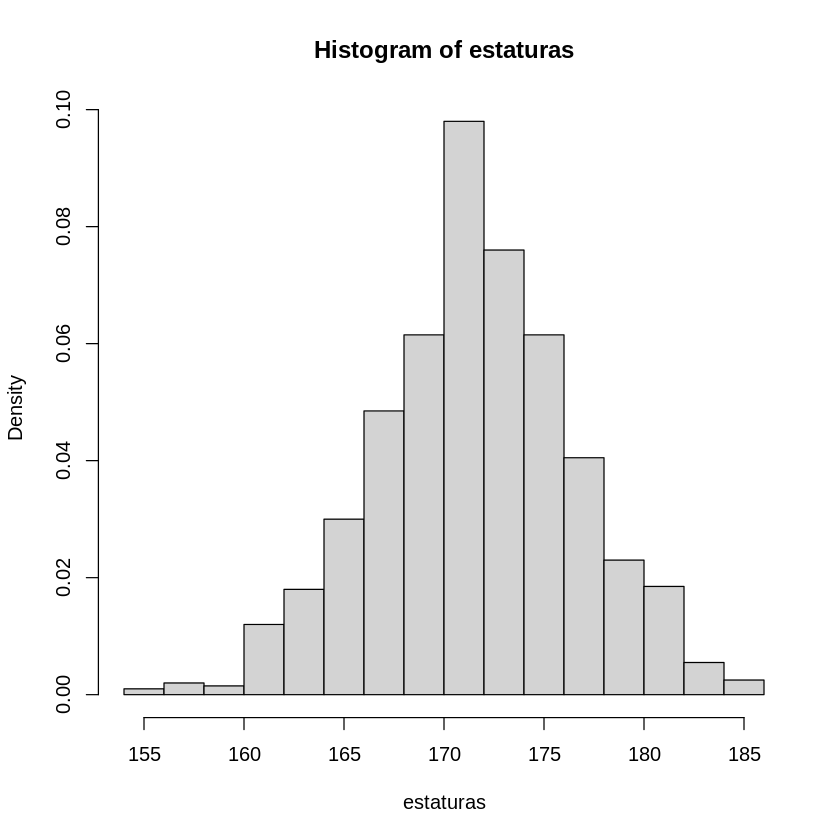

In [ ]:
hist(estaturas, freq = F)

In [ ]:
## NOTA
# dnorm() evalúa la función de densidad en el argumento dado
dnorm(1.2, mean = 0, sd = 1) # evaluación de la densidad en el punto 1.2, de una distrib. normal con media 1 y sd 0.

[1] 0.1941861

In [ ]:
(mu_est <- mean(estaturas))
(sd_est <- sd(estaturas))

[1] 171.57

[1] 4.962069

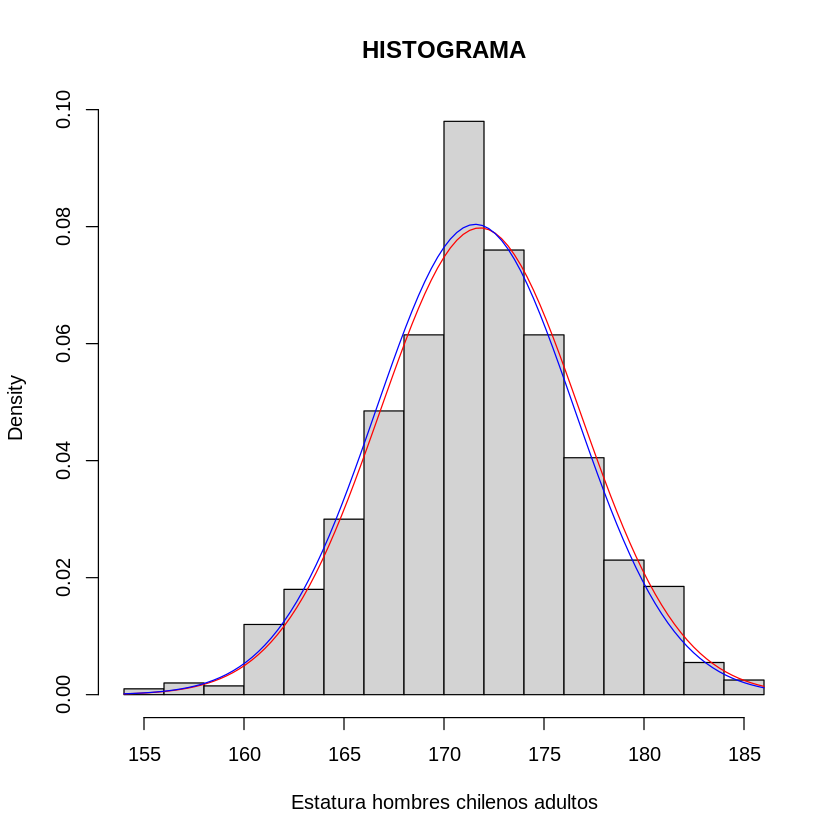

In [ ]:
hist(estaturas, freq = F,main = "HISTOGRAMA", xlab = "Estatura hombres chilenos adultos")
curve(dnorm(x,mean = 171.8, sd = 5), add = T, col = "red" )
curve(dnorm(x,mean = mu_est, sd = sd_est), add = T, col = "blue" )


In [ ]:
?hist

In [ ]:
# Podemos realizar lo mismo con ggplot, aunque con un poco de dificultad adicional
library(dplyr)
library(ggplot2)

In [ ]:
df <- data.frame(est = estaturas)
head(df)

,est
,<dbl>
1,172.5522
2,172.9562
3,169.1699
4,162.3354
5,173.6790
6,174.7242


## Paréntesis: Funciones
En R se pueden definir funciones de la siguiente manera

```
f <- function(...){
  # lo que se hace con ...
  return(valor)
}
```


`

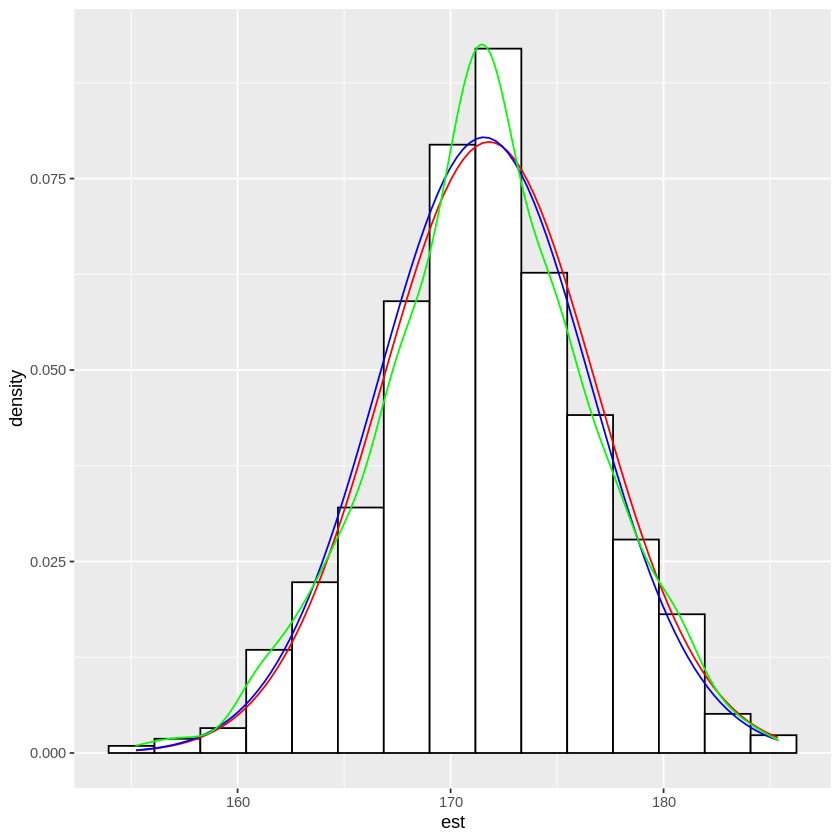

In [ ]:
df %>%
  ggplot() +
  aes(x = est) +
  geom_histogram(
    bins = 15,
    color = "black",
    fill = "white",
    aes(y = ..density..)
  ) + 
  stat_function(
    fun = function(x){dnorm(x,mean = 171.8, sd = 5)},
    col = "red"
  ) +
  stat_function(
    fun = function(x){dnorm(x,mean = mu_est, sd = sd_est)},
    col = "blue"
  ) +
  geom_density(color = "green")

# II)Distribucion binomial
## Contexto
Cuando una variable aleatoria representa la cantidad de éxitos en $n$ ensayos independientes de tipo Bernoulli (0 o 1), se dice que dicha variable sigue una distribución binomial.

## Función de probabilidad


$$p(x) = {n\choose x}p^x(1-p)^{n-x}$$
Donde $n$ es el total de ensayos realizados y $x$ es la cantidad de éxitos observados y $p$ es la probabilidad de éxito del evento de interés.

## En R...

* `dbinom(x, size, prob, log = FALSE)`: Evalúa la función de masa. En el caso discreto corresponde a la probabilidad del evento.
* `pbinom(q, size, prob, lower.tail = TRUE, log.p = FALSE)`: Calcula la probabilidad acumulada.
* `qbinom(p, size, prob, lower.tail = TRUE, log.p = FALSE)`: Retorna cuantiles de la distribución.
* `rbinom(n, size, prob)`: Genera muestras aleatorias.

**P2.** Suponga que un spot publicitario de un artículo tiene una tasa de efectividad de 20% sobre una determinada población.

**a)** Suponga que se logra llegar con el spot a 100 personas. ¿Cuál es la probabilidad de que 
 al menos 30  personas compren el artículo ofrecido?

In [1]:
# Identifiquemos algunos elementos como
# Experimento : Hacer llegar el spot a las 100 personas y registrar el número de clientes que efectivamente compraron el artículo.
# Variable aleatoria : X: "el número de clientes (de los 100) que compraron el artículo"
# Espacio muestral : {0,1,2,...,100}
#-------parámetros de pbinom ---------
#size (n): 100
#prob (p): 0.2

# Observaciòn sobre P(X >= 30)
pbinom(30, size = 100, prob = 0.2) # P(X <= 30) 

1-pbinom(30, size = 100, prob = 0.2) # P(X > 30)  = P(X >= 31) 
1-pbinom(29, size = 100, prob = 0.2) # P(X > 29)  = P(X >= 30) , con esto garantizamos que estamos evluando la probabilidad por la que se nos pregunta.

# Usando lower.tail = F

pbinom(29, size = 100, prob = 0.2, lower.tail = F) # P(X >= 30) 
# La probabilidad de que 30 o más personas compren el artículos es de 0.11%

[1] 0.9939407

[1] 0.006059335

[1] 0.01124898

[1] 0.01124898

In [2]:

# ¿Cuál es la probabilidad de que exactamente 30 personas compren el artículo ofrecido?
dbinom(30, size = 100, prob = 0.2) # 0.5% de prob (En el caso discreto, la probabilidad puntual la podemos obtener con la función de masa/densidad)
# ota alternativa
pbinom(30, size = 100, prob = 0.2) - pbinom(29, size = 100, prob = 0.2)




[1] 0.005189643

[1] 0.005189643

**P3.** En una localidad se sabe que el 70% de las casas tienen un televisor.  Se quiere realizar una encuesta a 8 casas ¿cuál es la probabilidad de que 6 o más de ellas tengan televisor?

In [3]:
# size = 8 
# prob = 0.7
pbinom(5, size = 8, prob = 0.7, lower.tail = F)# 55% de prob de que 6 omás casa tengan televisor


[1] 0.5517738

## Lanzando una moneda 
**P4** Supongamos que una **honesta** se lanza 14 veces y se anota el número veces que se obtuvo cara.

**a)** ¿Cuál es la probabilidad de obtener exactamente 4 caras? ¿y al menos 10?

In [6]:
#size = n = 14, y prob = p = 0.5 ?

dbinom(4, size = 14, prob = 0.5)
pbinom(9, size = 14, prob = 0.5,lower.tail = F)

[1] 0.06109619

[1] 0.08978271

  
**b)** Si se repite el experimento 5 veces. ¿Qué proporción de caras se debería esperar?¿y si se repite más veces?  Utillice la función rbinom para simular el experimento 100 veces.

In [58]:
prob <- 0.5
14*0.3

[1] 4.2

In [59]:
#(5 veces)
(exp_5 <- rbinom(n = 5, size = 14, prob = prob))
mean(exp_5)

[1]  9  8 10  7  9

[1] 8.6

In [60]:
# simulamos un experimento binomial (50 veces)
exp_50 <- rbinom(n = 50, size = 14, prob = prob)
mean(exp_50)

[1] 6.54

In [61]:
# simulamos un experimento binomial (100 veces)
exp_100 <- rbinom(n = 100, size = 14, prob = prob)
mean(exp_100)


[1] 7.15

In [69]:
# simulamos un experimento binomial (1000 veces)
set.seed(112358)

exp_1000 <- rbinom(n = 1000, size = 14, prob = prob)
mean(exp_1000)


[1] 6.92

In [70]:
(lanzamientos <- exp_1000)

[1]  6  8  9  8  8  9  6  8  9  4  4  7  6  4  8  8  5  3  8  6  5 10  6  5
  [25]  5  8  8  5 10  5 10  9  5 12  9  8  8 11  8  8  6  7  8  9  7  9  7  9
  [49]  3  9 11  6  8 10  8 10  8  7  7  6  5  5  7  8  8  9  8 10  6  4  8  4
  [73]  5  5  6  8  6  7  4  9  9  4  8  9  8  9  7  8  4  8  7  6 12  7  7  8
  [97]  7  5  9  7  8  8  6  7  4  8  7  6 10  7  8  4  8  8  8  8  9  9  6  7
 [121]  7  6  7  4  7  7  6  5  7 11  9 11  7  8  4  7  8  8 11  6  5  5  5  8
 [145]  6  9  6  5  7  4  7  5 10  9  6  5  6  7  5  5  5  4 11  7  5  5  5  3
 [169]  8  7  7  3  5  6  7  7  7  7 10  4 10  6  5  5  7  5  8  7  4  6  7  6
 [193]  5  7  5  9  9  8  7  6  6  8  9  3  6  9  6  7  9  4  9  8  8  7  7  8
 [217]  6  7  6  7  4  7  7  8  5  8 10  4  5  3  4  4  5  6  7  5  9  6  5  3
 [241]  6  8  5  8  9  7  9 10  4  9  8  8  5  4  5  9  5  9  8  5  6  9  5  7
 [265]  7  7  8  9  7  8  8  8  9  7  6  7  5  8  4 10  9  8  8  9  7  7  7  5
 [289]  9  7 10  2  8  8  4  6  6  6  6  7  8  8  9  7  8  7  6  6  4  2  8  3
 [313]  8  5  5  8  3  7  4  6  9 10  4  6 10  5 11  7  6 10  8  4  9  9  7  6
 [337]  6 11 12  7  6  7  6  5  4 10  8  4  8  4  6  8  6  5  8  7  8  7  8  7
 [361]  7  6  7  9  6  9 10  7 10  7  6  5  6  5  8  7  9  8  5 10  8  5 10  6
 [385] 10  7  9  7  5 10  9  4  5  7  6  7  4  6 10  6  4  7  4  5  7  8  9  5
 [409]  8  6  7  7  8  5  6  4  6  7  2  8  6  3  7 10  6  8  6  6  8  5  5  7
 [433]  5  8  7  5  7  5  5  5  6  5  7  8  6  8 10  9  6  6  4  5  8  7  4  9
 [457]  6  6  7  5  7  6  4  6  9  6  3  8 10  6  7  5  8 12  6 11  6  7  5  7
 [481]  5  6  9  9  9  6  8  5  6  5  7  6  8  7  6  4  6  5  6  6 10  5  8 10
 [505] 10  7  9  7  6  7  6  5  9  8  6  4  7  8  6  6  6  6  6  4  6  9  6  7
 [529]  8  6  7  8  5  8  6  7  7 10  5  9  4  9  6  7  8  8  5  7  6  7  9  8
 [553]  4  6  8 10  8 10  8  8  9  7  6  3  6  5  6  8  6  6  5  5  7  6  6  9
 [577] 10  5  5  8  7  6  5  9  9 10  5  3  8  4  6  5  8  6 10  9  7  7  8  9
 [601]  9  6  4  8  5  9  7  7 10  9  6 11  8  6  7  5  6  6  8  6  5  6  7  8
 [625]  8  9  8  4  9 11  4  6  7  7  9  8  6  7 10  5  8  8 11  2  8 10  8  6
 [649]  6  5  8  8  6  8  7 10  4  6  6  5  6  6 10  8  9  9 10  9  8  8  9  7
 [673]  6  8  9  8  9  8  6  5  6  8  9  8  7  8  8  6  5  6  5  9  5 10 10  7
 [697]  7  7  7  8  4  5  6  4  8  6  8  7  8  6  7  6  9 10  8  4  7  9  8  9
 [721]  2 10  6  9  7  8  9 10  9  6  7  7  6 10  7  9  7  7  4  8  8  7  8  7
 [745]  4 10  8  7 11  8  8  6  8  7  8  8  5  7  5  8  8  7  5  6 10  7  8  6
 [769]  6  3  8  7  9  4  6  8  9  6  4  5  7  7  5  4  7  7  9  8  4  8  5  6
 [793]  9  7  8  9  7  3  9  8  5  7  7  6  8  5 10  6  6  7  4  8  9  5  9  7
 [817]  7  5  8  7  7  7  9  7  6  7  3  4  9  5  7 11  6  9  8  8  9  8  4  9
 [841] 10  5  4  5  8  4  5  9  5  7  6  4  6  8  7  7  7  9  9  6  7  6  8  8
 [865]  6  9  8  6  8  6  9  8  6  6  7  5  9  5  7  7  8  8  5  7  3  5  7  5
 [889]  6  8  7  4  7  6  5 11  4  7  6  8  5  8  7  9  9  9  6 10  5  9  6  7
 [913]  8  6  7 10 10  6  8  5  8  4  7  4  9  6  7  8  5  5 10  8  7  8  9  7
 [937]  8  1  7  6  9  6  8  5  8  7  7  4  4  7  7  6  3  8  7  2  3  7  4  8
 [961]  9  5  6  7  6  6  9  7  9  8  6  8  6  5  7  8  6  7  3  6  8  7  5  9
 [985]  9  9  7  7  6 10  7  8  8  9  6  7  6  8  7  8

In [71]:
# podemos construir un gráfico de barras con los conteos
df <- data.frame(caras   = lanzamientos)
head(df)

df %>% 
  count(caras)


,caras
,<int>
1,6
2,8
3,9
4,8
5,8
6,9


caras,n
<int>,<int>
1,1
2,6
3,20
4,72
5,128
6,182
7,198
8,196
9,120


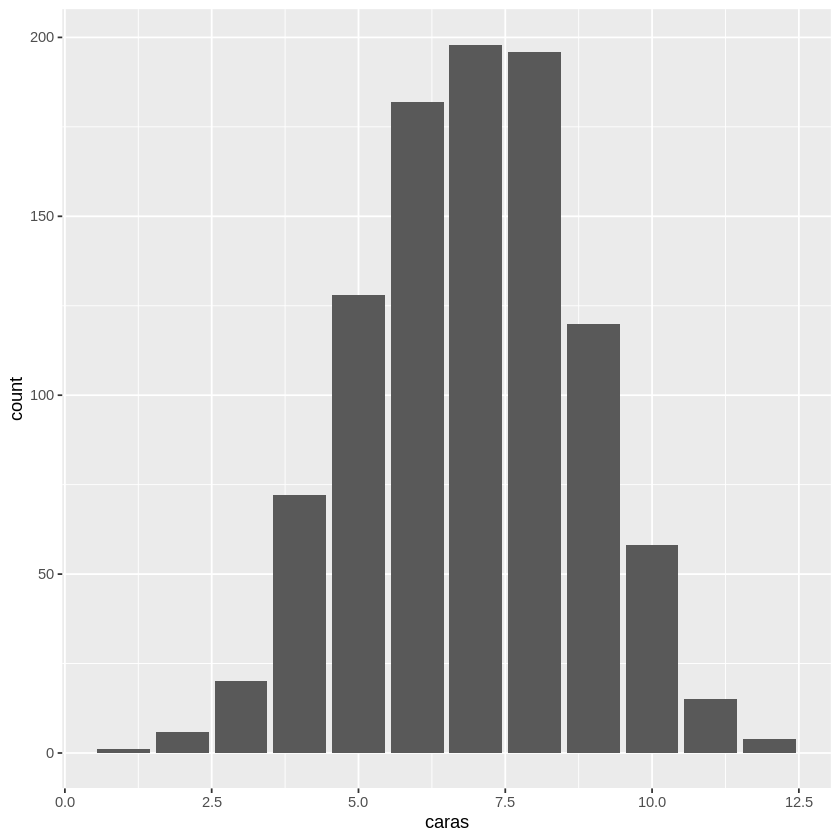

In [72]:
# gráfio ggplot 

df %>% 
    ggplot() +
    aes(x = caras) +
    geom_bar(stat = "count")



[1] 1000

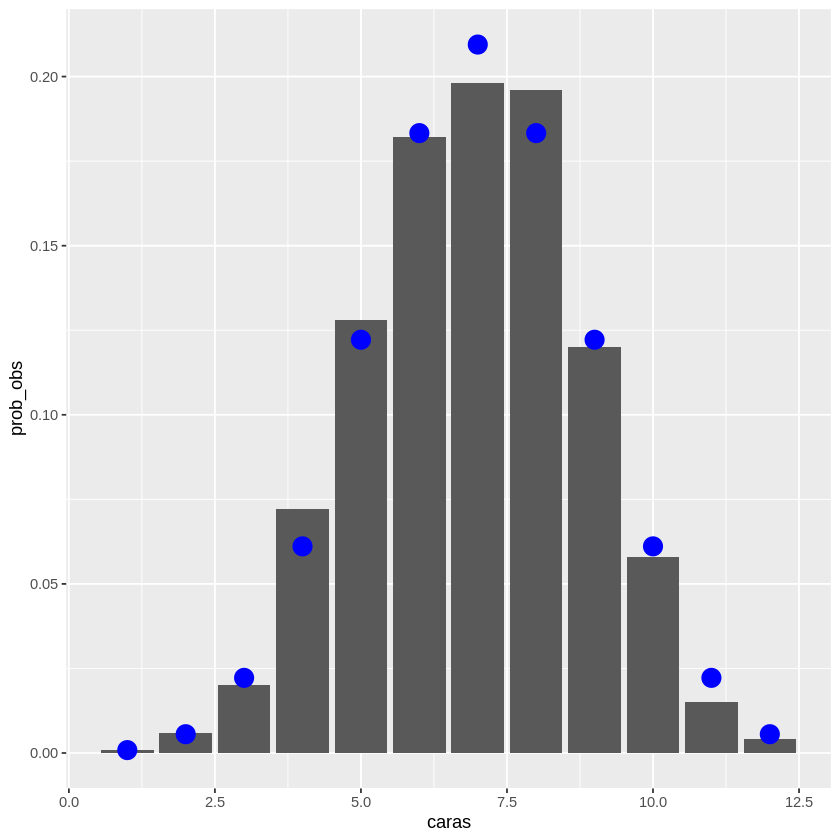

In [75]:
# Pero si queremos visualizar las frecuencias relativas observadas?
# Adicionalmente nos interesaría poder visualizar la función de masa de probabilidad.
(N <- nrow(df))

df %>% 
  group_by(caras) %>%
  summarise(count = n(),
            prob_obs = count/N) %>%
  mutate(prob_real = dbinom(caras,size = 14, prob = 0.5)) %>%
  ggplot() + 
  aes(x = caras, y = prob_obs) +
  geom_bar(stat = "identity") +
  geom_point(aes(y = prob_real), color = "blue", size = 5)




# III) Distribución poisson
## Contexto
Usualmente una variable aleatoria poisson, representa la cantidad de eventos registrados en un interval fijo de tiempo con una cierta tasa de ocurrencia.
## Función de probabilidad

$$p(x) = \lambda^x \dfrac{e^{-\lambda}}{x!}$$

Donde $\lambda$ corresponde a la tasa de ocurrencia y $x$ la cantida de eventos observados.

## Funciones en R
 * `dpois(x, lambda, log = FALSE)`
 * `ppois(q, lambda, lower.tail = TRUE, log.p = FALSE)`
 * `qpois(p, lambda, lower.tail = TRUE, log.p = FALSE)`
 * `rpois(n, lambda)`

**P5.** Suponga que en un restaurant de comida se tiene una tasa de llegada de clientes de 2 clientes por cada 3 minutos en promedio. 
¿Cuál es la probabilidad de que 5 o más clientes lleguen en un período de 9 minutos?.


In [78]:
# La tasa de éxito en una dist. poisson es el parámetro lambda 
# Dada la info, se tiene una tasa de 6 clientes cada 9 minutos
1-ppois(4, lambda = 6, lower.tail = T)


ppois(4, lambda = 6, lower.tail = F) # Hay un 71% de prob  de que lleguen 5 o  más personas en un intervalo de 9 min.






[1] 0.7149435

[1] 0.7149435

**P6.** Se sabe que la tasa de falla en la elaboración de ampolletas sigue una distribución poisson, con una tasa de falla de 3 ampolletas defectuosas por semana.
¿Cuál es la probabilidad de que al cabo de un mes se genere un total de 20 ampolletas defectuosas o más?



In [80]:
# lambda = 3*4 = 12 ampolletas defectuosas por mes
ppois(19, lambda = 12, lower.tail = F) # Hay un 2% de prob de obtener 20 o más ampolletas defectuosas.


[1] 0.02127977

In [82]:
dpois(17, lambda = 12) # Hay un 3% de prob de obtener sólo 17 ampolletas defectuossas en un mes. (en este caso no spreguntamos por la probabilidad puntual del evento en cuestión)

[1] 0.03832471

In [83]:
qpois(0.9, lambda = 12) # El 90% de las veces (meses) se obtendrá como máximo 17 ampolletas defectuosas. 

[1] 17